In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


# Load the train data
train_url = "https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv"
train_df = pd.read_csv(train_url)

# Load the validation data
val_url = "https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Val.csv"
val_df = pd.read_csv(val_url)

# Load the test data
test_url = "https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/english_test_with_labels.csv"
test_df = pd.read_csv(test_url)

In [9]:
# Concat all the dataframes
df = pd.concat([train_df, val_df, test_df], axis=0)

In [10]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [11]:
# Convert the labels to binary
df['label'] = df['label'].apply(lambda x: 1 if x == 'fake' else 0)

In [37]:
# plt figure size
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [29]:
# Remove if len(df['tweet'])>200
df.drop(df[df['tweet'].str.len() > 200].index, inplace=True)

<AxesSubplot:xlabel='length', ylabel='Count'>

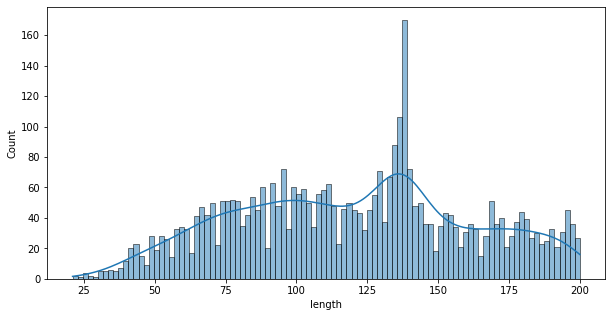

In [39]:
# Plot the length of the tweets
df['length'] = df['tweet'].apply(lambda x: len(x))

# Plot the distribution of the tweet lengths
sns.histplot(df['length'], kde=True, bins=100)


<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

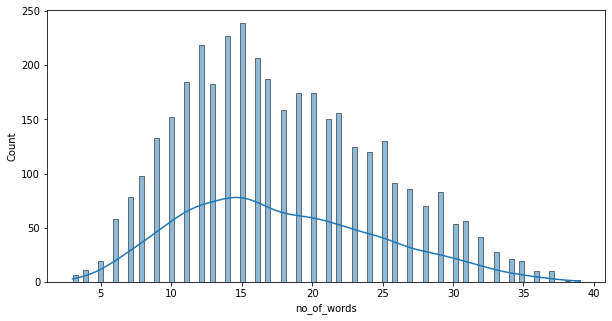

In [40]:
# Number of words in the tweets
df['no_of_words'] = df['tweet'].apply(lambda x: len(x.split()))

# Plot the distribution of the number of words
sns.histplot(df['no_of_words'], kde=True, bins=100)

In [81]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

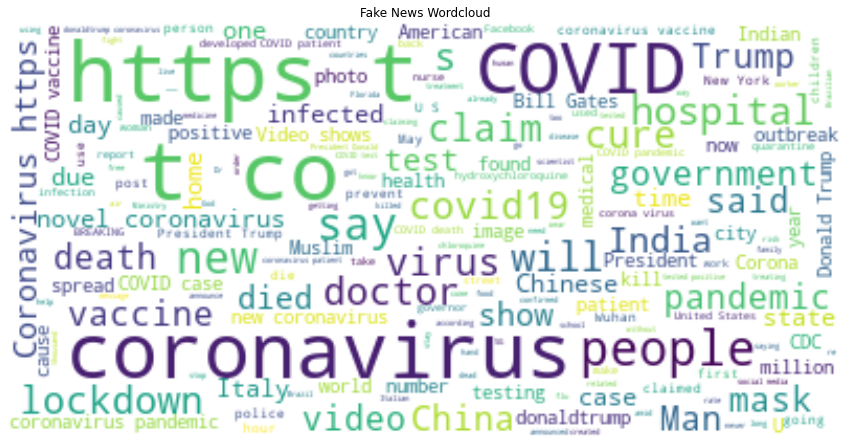

In [82]:
# Create a wordcloud image for the fake news
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40, random_state=42).generate(df[df['label'] == 1]['tweet'].str.cat(sep=' '))

# Display the generated image:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News Wordcloud")
plt.show()


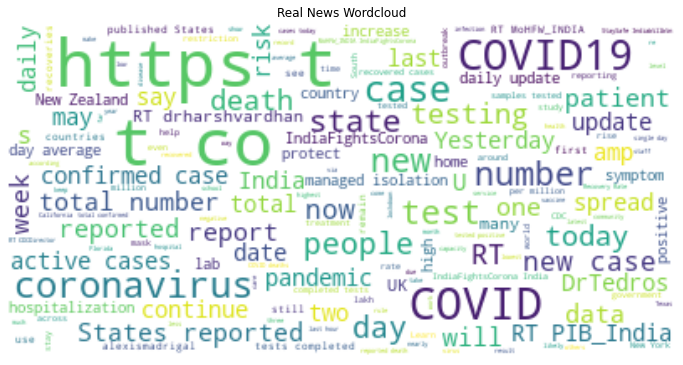

In [83]:
# Create a wordcloud image for the real news 
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40, random_state=42).generate(df[df['label'] == 0]['tweet'].str.cat(sep=' '))

# Display the generated image:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Real News Wordcloud")
plt.show()


In [64]:
from nltk import word_tokenize
# Build a freq dictionary for the words in fake news
fake_words = df[df['label'] == 1]['tweet'].str.cat(sep=' ')
fake_words_dict = {}


for word in fake_words.split():
    if word not in fake_words_dict:
        fake_words_dict[word] = 1
    else:
        fake_words_dict[word] += 1

# Top 20 words in fake news
fake_words_dict = sorted(fake_words_dict.items(), key=lambda x: x[1], reverse=True)[:20]

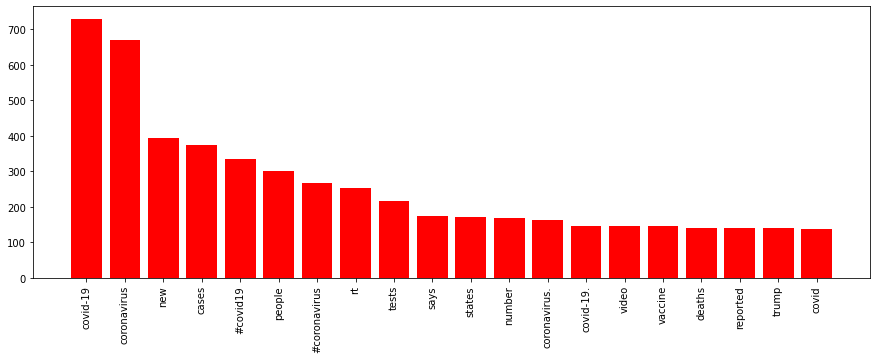

In [77]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def build_dict(df, words_dict = {} ):
    # Build a freq dictionary for the words in fake news
    # Return a dic of top n words in the text with their frequencies
    for word in df['tweet'].str.cat(sep=' ').split():

        # Do not consider stop words
        if word.lower() not in stop_words:
            if word.lower() not in words_dict:
                words_dict[word.lower()] = 1
            else:
                words_dict[word.lower()] += 1
    # Top 20 words in fake news
    words_dict = sorted(words_dict.items(), key=lambda x: x[1], reverse=True)[:20]
    return words_dict

 
top_fake_words = build_dict(df[df['label'] == 1])

# Plot the top 20 words in fake news
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.bar(range(len(top_fake_words)), [x[1] for x in top_fake_words], align='center', color='red')
plt.xticks(range(len(top_fake_words)), [x[0] for x in top_fake_words], rotation='vertical')
plt.show()

        

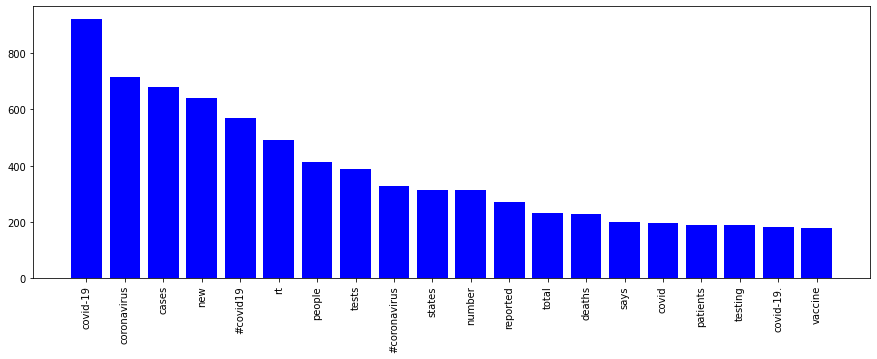

In [78]:
# Build a freq dictionary for the words in real news
top_real_words = build_dict(df[df['label'] == 0])

# Plot the top 20 words in real news
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.bar(range(len(top_real_words)), [x[1] for x in top_real_words], align='center', color='blue')
plt.xticks(range(len(top_real_words)), [x[0] for x in top_real_words], rotation='vertical')
plt.show()
